In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [16]:
ie = session.query(Measure).first()
ie.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2aac683d1c0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [17]:
ie2 = session.query(Station).first()
ie2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2aac683da30>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
last_date = session.query(Measure.date).order_by(Measure.date.desc()).first()

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date

('2017-08-23',)

In [24]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(weeks=52)
year_ago

datetime.date(2016, 8, 24)

In [48]:
# Perform a query to retrieve the date and precipitation scores
prcp_1year = session.query(Measure.date, Measure.prcp).filter(Measure.date > year_ago).all()

In [49]:
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(prcp_1year,columns=["Date","Precipitation"])
prcp_df.head()

,Date,Precipitation
0,2016-08-25,0.08
1,2016-08-26,0.00
2,2016-08-27,0.00
3,2016-08-28,0.01
4,2016-08-29,0.00


In [50]:
# And set the index to the date column  # Sort the dataframe by date
prcp_df.set_index(["Date"],inplace=True)
prcp_df.head(20)

,Precipitation
Date,
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00
2016-09-02,0.00


[]

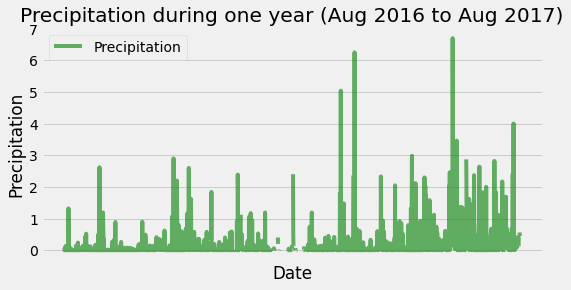

In [54]:
# Use Pandas Plotting with Matplotlib to plot the data
plot= prcp_df.plot(kind="line",
                    figsize=(8,4),
                    rot=60,
                    title="Precipitation during one year (Aug 2016 to Aug 2017)",
                    ylabel="Precipitation",
                    xlabel="Date",
                    color="green", 
                    alpha=0.6
                )
plot.axes.xaxis.set_ticks([])

### I have grouped by month for better plotting

In [68]:
prcp_by_month = session.query(func.strftime("%m",Measure.date), func.sum(Measure.prcp)).\
                filter(Measure.prcp != None).group_by(func.strftime("%m",Measure.date)).all()

In [69]:
prcp_by_month

[('01', 210.56000000000003),
 ('02', 201.23999999999995),
 ('03', 319.82000000000005),
 ('04', 240.27000000000004),
 ('05', 236.5800000000001),
 ('06', 214.6299999999999),
 ('07', 263.47000000000014),
 ('08', 218.81999999999994),
 ('09', 226.50000000000017),
 ('10', 224.85000000000016),
 ('11', 246.76),
 ('12', 304.6299999999995)]

In [70]:
prcp_by_month_df = pd.DataFrame(prcp_by_month,columns=["Month","Precipitation"])
prcp_by_month_df.set_index(["Month"],inplace=True)
prcp_by_month_df.head(10)

,Precipitation
Month,
01,210.56
02,201.24
03,319.82
04,240.27
05,236.58
06,214.63
07,263.47
08,218.82
09,226.50


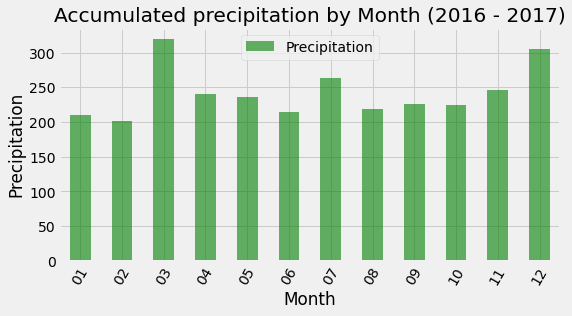

In [73]:
plot= prcp_by_month_df.plot(kind="bar",
                    figsize=(8,4),
                    rot=60,
                    title="Accumulated precipitation by Month (2016 - 2017)",
                    ylabel="Precipitation",
                    xlabel="Month",
                    color="green", 
                    alpha=0.6
                )

In [ ]:
plt.scatter(prcp_df.index, pr)
prcp_df.plot(kind="bar",
                figsize=(8,4),
                rot=60,
                title="Precipitation during one year",
                ylabel="Precipitation",
                xlabel="Date",
                color="green", 
                alpha=0.6
               )

In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [75]:
prcp_by_month_df.describe()

,Precipitation
count,12.000000
mean,242.344167
std,36.882724
min,201.240000
25%,217.772500
50%,231.540000
75%,250.937500
max,319.820000


# Exploratory Station Analysis

In [81]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station.distinct())).all()
total_stations

[(9,)]

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_st = session.query(Measure.station, Station.id, func.count(Measure.station)).\
                filter(Measure.station==Station.station).\
                group_by(Measure.station).\
                order_by(func.count(Measure.station).desc()).\
                all()
most_active_st

[('USC00519281', 7, 2772),
 ('USC00519397', 1, 2724),
 ('USC00513117', 2, 2709),
 ('USC00519523', 6, 2669),
 ('USC00516128', 9, 2612),
 ('USC00514830', 3, 2202),
 ('USC00511918', 8, 1979),
 ('USC00517948', 4, 1372),
 ('USC00518838', 5, 511)]

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostact=most_active_st[0][1]
active_station_temp = session.query(Measure.station, 
                                    func.min(Measure.tobs), 
                                    func.max(Measure.tobs), 
                                    func.avg(Measure.tobs)).\
                                    filter(Measure.station==Station.station).\
                                    filter(Station.id == mostact).all()

print(f"Station: {active_station_temp[0][0]}")
print(f"Min: {active_station_temp[0][1]}")
print(f"Max: {active_station_temp[0][2]}")
print(f"Avg: {round(active_station_temp[0][3],1)}")

Station: USC00519281
Min: 54.0
Max: 85.0
Avg: 71.7


In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
mostact_year_temp = session.query(Measure.date, Measure.tobs).\
                    filter(Measure.station==Station.station).\
                    filter(Station.id == mostact).\
                    filter(Measure.date > year_ago).all()

In [94]:

mostact_year_temp_df = pd.DataFrame(mostact_year_temp,columns=["Date","Temperature"])
mostact_year_temp_df.set_index(["Date"],inplace=True)
mostact_year_temp_df.head(10)

,Temperature
Date,
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0
2016-09-02,80.0


Text(0, 0.5, 'Frequency')

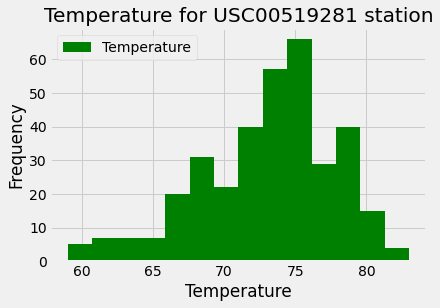

In [113]:
# And plot the results as a histogram
mostact_year_temp_df.plot.hist(bins=14, color="green")
plt.title(f"Temperature for {active_station_temp[0][0]} station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()